In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


In [6]:
#importing data
df = pd.read_csv('social_net_ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


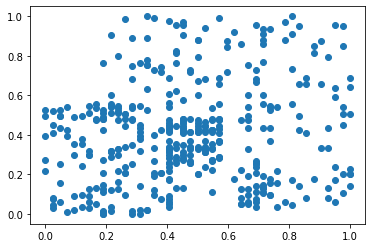

In [17]:
#scatter plot
plt.scatter(df.Age,df.EstimatedSalary)

In [16]:
#scalling the data
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(df[['Age']])
df.Age = ms.transform(df[['Age']])
ms.fit(df[['EstimatedSalary']])
df.EstimatedSalary = ms.transform(df[['EstimatedSalary']])


In [25]:
#finding sum squares of error
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','EstimatedSalary']])
    sse.append(km.inertia_)

In [26]:
sse

[50.30909586517733,
 31.61857093976049,
 20.35563515997348,
 15.472670221373022,
 11.405365006904654,
 8.409340601376856,
 7.104449367763447,
 6.3184178361570495,
 5.603703912496445]

Text(0, 0.5, 'sse')

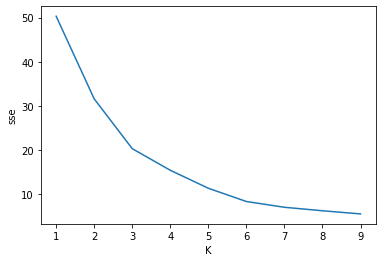

In [27]:
#plotting the elbow to find the number of clusters
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('sse')
         

In [28]:
#finding clusters 
km = KMeans(n_clusters=3)
y_pre=km.fit_predict(df[['Age','EstimatedSalary']])
y_pre

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0,
       2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1,

In [32]:
df['cluster']=y_pre
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,0.023810,0.029630,0,2
1,15810944,Male,0.404762,0.037037,0,2
2,15668575,Female,0.190476,0.207407,0,2
3,15603246,Female,0.214286,0.311111,0,2
4,15804002,Male,0.023810,0.451852,0,2


In [37]:
km.cluster_centers_

array([[0.58524397, 0.79789666],
       [0.66718054, 0.30210498],
       [0.26137566, 0.30876543]])

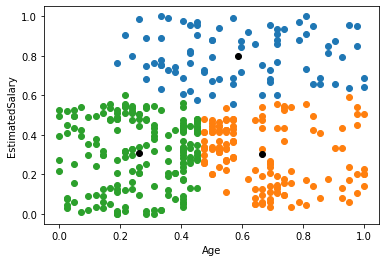

In [39]:
#scatter plot of the clusters
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]
plt.scatter(df1.Age,df1.EstimatedSalary)
plt.scatter(df2.Age,df2.EstimatedSalary)
plt.scatter(df3.Age,df3.EstimatedSalary)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')